## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

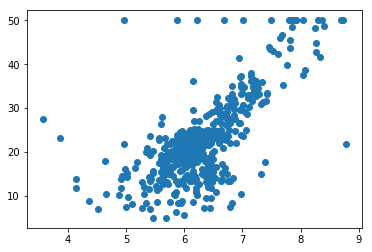

In [2]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import random

data = load_boston()
X, y = data['data'], data['target']

def draw_rm_and_price():
    plt.scatter(X[:, 5], y)
    #plt.show()

def price(rm, k, b):
    '''f(x) = k * x + b'''
    return k * rm + b


X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()

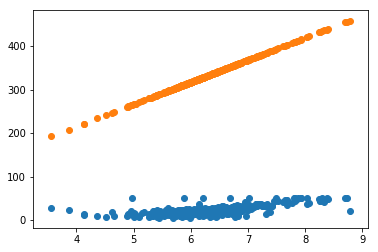

In [19]:
%matplotlib inline
import random
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b  
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

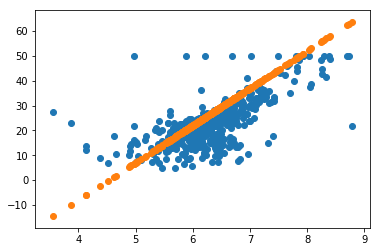

In [25]:
%matplotlib inline
def loss(y, y_hat):
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

def method_1(X_rm):
    trying_times = 1000
    min_loss = float('inf')

    best_k = float('inf')
    best_b = float('inf')


    for i in range(trying_times):
        k = random.random() * 200 - 100
        b = random.random() * 200 - 100
        price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
        current_loss = loss(y, price_by_random_k_and_b)

        if current_loss < min_loss:
            min_loss = current_loss
            best_k, best_b = k, b
            print('time is: {}, best_k: {}, best_b: {}, loss is {}'.format(i, best_k, best_b, min_loss))

    X_rm = X[:5]

    print(best_k, best_b)
    draw_rm_and_price()
    price_by_random_k_and_b = [price(r, best_k, best_b) for r in X_rm]
    plt.scatter(X_rm, price_by_random_k_and_b)

            
    
X_rm = X[:, 5]
k = 15
b = -68
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

In [26]:

trying_times = 2000
min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [(+1,-1), (+1,+1), (-1,-1), (-1,+1)]
next_direction = random.choice(direction)
scalar = 0.1
for i in range(trying_times):

    k_direction, b_direction = next_direction
    current_k, current_b = best_k + k_direction * scalar, best_b + k_direction * scalar
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        next_direction = next_direction
        print('time is: {}, get bset_k: {}, best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)



time is: 0, get bset_k: -27.534717773775093, best_b: 25.514053100816746, and the loss is: 29626.82004974635
time is: 2, get bset_k: -27.43471777377509, best_b: 25.614053100816747, and the loss is: 29375.974100935215
time is: 3, get bset_k: -27.33471777377509, best_b: 25.71405310081675, and the loss is: 29126.199323991557
time is: 4, get bset_k: -27.23471777377509, best_b: 25.81405310081675, and the loss is: 28877.495718915394
time is: 5, get bset_k: -27.134717773775087, best_b: 25.91405310081675, and the loss is: 28629.863285706655
time is: 6, get bset_k: -27.034717773775085, best_b: 26.014053100816753, and the loss is: 28383.302024365432
time is: 7, get bset_k: -26.934717773775084, best_b: 26.114053100816754, and the loss is: 28137.811934891688
time is: 8, get bset_k: -26.834717773775083, best_b: 26.214053100816756, and the loss is: 27893.393017285365
time is: 9, get bset_k: -26.73471777377508, best_b: 26.314053100816757, and the loss is: 27650.04527154654
time is: 10, get bset_k: -26

In [50]:
def method_3():
    trying_times = 2000
    min_loss = float('inf')

    ct = 0
    step = 0.2
    k = random.randint(-100, 100)
    b = random.randint(-100 , 100)

    success_count = 0
    for i in range(trying_times):
        delta_k = 0
        delta_b = 0

        for x_, y_ in zip(list(X_rm), list(y)):
            #print(x, y)  求导

            delta_k += (2 * x_ * x_ * k + 2 * b * x_ -2 * x_ * y_)/len(y)
            delta_b += (2 *b + 2 * x_ * k - 2 * y_)/len(y)



        k = k - delta_k/2000
        b = b - delta_b/2000


        price_by_k_and_b = [price(r, k, b) for r in X_rm]
        current_loss = loss(y, price_by_k_and_b)

        if current_loss < min_loss:

            min_loss = current_loss
            #print(delta_k, delta_b)
            if ct % 100 == 0:
                print('time is: {}, best_k: {}, best_b: {}, and the loss is: {}'.format(i,k, b, min_loss))

        ct += 1

method_3()

time is: 0, best_k: 59.115247449669965, best_b: -65.29582989130435, and the loss is: 81755.48052499727
time is: 100, best_k: 15.67159394808944, best_b: -72.07914408372937, and the loss is: 79.90547374209359
time is: 200, best_k: 15.002680974018059, best_b: -72.13810778486166, and the loss is: 60.90247606795081
time is: 300, best_k: 14.9855188829263, best_b: -72.09466845042101, and the loss is: 60.856528085292545
time is: 400, best_k: 14.978295648448546, best_b: -72.04972211803789, and the loss is: 60.815080833121556
time is: 500, best_k: 14.971232214108891, best_b: -72.00480603834694, and the loss is: 60.77373415019621
time is: 600, best_k: 14.964179570080525, best_b: -71.9599435699084, and the loss is: 60.73248677595636
time is: 700, best_k: 14.957135435916864, best_b: -71.91513500475996, and the loss is: 60.69133847164108
time is: 800, best_k: 14.950099766843334, best_b: -71.87038028356018, and the loss is: 60.65028899929949
time is: 900, best_k: 14.943072552161473, best_b: -71.82567

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans:自动化高效；精准

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:因随机的计算导致耗时长，最后也不一定是最优解

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:有方向性的解法比第一种好；缺点是方向性和步长不变导致求解的速度慢

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:快速精准求解

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:梯度下降；梯度：对一个函数中的各个向量做偏导数，以向量的方式呈现就是梯度；梯度下降：损失函数的最小值；梯度上升：损失函数的最大值

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:速度快，精准

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:给定条件让机器自动化求解

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



In [27]:
# -*- coding:utf-8 -*-

from bs4 import BeautifulSoup
import requests, re, urllib, time
from collections import defaultdict


def requests_get_all_contents(url):
    requests_get_all = requests.get(url, headers=headers)
    #print(requests_get_all.status_code)
    requests_get_all.encoding = requests_get_all.apparent_encoding
    return requests_get_all

def write_in_text(content, file_name):
    with open(file_name, 'w', encoding='utf-8') as f:
        f.writelines(content)

def merge_new_sites(new_site, all_sites):
    for k in new_site:
        if k in all_sites:
            all_sites[k]['nabours'] += new_site[k]['nabours']
            all_sites[k]['line'] += new_site[k]['line']
        else:
            all_sites.update(new_site)
    return(all_sites)

def  find_string_key_word_tables(table_key_words, soup):
    for i in table_key_words:
        key_word_all_info = soup.find_all(string = re.compile(".*" + i + "$"))
        for r in key_word_all_info:
            if r.find_parents('table'):  # 14号线参考资料里面有个  列车时刻表 的祖节点无table，上面是有正确信息的
                return i
    return False

def not_inclued(list, string):
    for each in list:
        if each in string:
            return False
    return True

def add_one_site_in_one_line(all_sites_in_one_line, remain_list, string):
    if not_inclued(remain_list, string):
        all_sites_in_one_line.append(string.strip('站'))
    else:
        all_sites_in_one_line.append(string)
    return all_sites_in_one_line

def sites_search_shikebiao_shijianbiao(all_sites_in_one_line, line_site_table):
    first_column = line_site_table.find_all('tr', )
    for each in first_column:
        if each.next_element.string == None:
            continue
        if not_inclued(remove_list, each.next_element.string):
            all_sites_in_one_line = add_one_site_in_one_line(all_sites_in_one_line, remain_list, each.next_element.string)
    return all_sites_in_one_line

def sites_search_jianjuxinxi(all_sites_in_one_line, line_site_table):
    first_column = line_site_table.find_all('tr', )
    for each in first_column:
        if each.next_element.string == None:
            continue
        if not_inclued(remove_list, each.next_element.string):
            site = each.next_element.string.split('——')[0]
            all_sites_in_one_line = add_one_site_in_one_line(all_sites_in_one_line, remain_list, site)
    return all_sites_in_one_line

def sites_search_chezhanmingcheng(all_sites_in_one_line, line_site_table):
    first_column = line_site_table.find_all('tr', )
    for each in first_column:
        site = each.find_all(string = re.compile('.*站$'))
        if site == []:
            continue
        else:
            all_sites_in_one_line =add_one_site_in_one_line(all_sites_in_one_line, remain_list, site[0])
    return all_sites_in_one_line

def search_all_sites_in_one_line(k, v, single_line_soup):
    line_site_tables = single_line_soup.find_all(string=re.compile(".*" + v['search_table'] + "$"))
    #print(line_site_tables)
    if v['search_table'] == '车时刻表' or v['search_table'] == '车时间':  #时刻表可能有分段的，另外两种情况没有
        for t in line_site_tables:
            all_sites_in_one_line = []
            if not t.find_parents('table'):  #14号线参考资料里面有个  列车时刻表 祖节点无table
                continue
            line_site_table = t.find_parents('table')[0]
            all_sites_in_one_line = sites_search_shikebiao_shijianbiao(all_sites_in_one_line, line_site_table)
            add_new_site(all_sites_in_one_line, k, v)

    if v['search_table'] == '间距信息统计表':
        all_sites_in_one_line = []
        all_sites_in_one_line = sites_search_jianjuxinxi(all_sites_in_one_line, line_site_tables[0].find_parents('table')[0])
        add_new_site(all_sites_in_one_line, k, v)
    if v['search_table'] == '车站名称':
        all_sites_in_one_line = []
        all_sites_in_one_line = sites_search_chezhanmingcheng(all_sites_in_one_line, line_site_tables[0].find_parents('table')[0])
        add_new_site(all_sites_in_one_line, k, v)

    #print(len(all_sites_in_one_line))
    #print (False if  all_sites_in_one_line == [] else True)
    return (False if  all_sites_in_one_line == [] else True)


def add_new_site(all_sites_in_one_line, line_parameters_k, line_parameters_v ):
    for i in range(len(all_sites_in_one_line)):
        new_site_dict = defaultdict(dict)
        new_site_dict[all_sites_in_one_line[i]]['name'] = all_sites_in_one_line[i]
        new_site_dict[all_sites_in_one_line[i]]['line'] = [line_parameters_k]
        if i == 0 and  line_parameters_v['loop'] == True:
            new_site_dict[all_sites_in_one_line[i]]['nabours'] = [all_sites_in_one_line[i + 1]] + [all_sites_in_one_line[-1]]
        elif i == 0:
            new_site_dict[all_sites_in_one_line[i]]['nabours'] = [all_sites_in_one_line[i + 1]]
        elif i == len(all_sites_in_one_line) -1 and  line_parameters_v['loop'] == True:
            new_site_dict[all_sites_in_one_line[i]]['nabours'] = [all_sites_in_one_line[i - 1]] + [all_sites_in_one_line[0]]
        elif i == len(all_sites_in_one_line) -1:
            new_site_dict[all_sites_in_one_line[i]]['nabours'] = [all_sites_in_one_line[i - i]]
        else:
            new_site_dict[all_sites_in_one_line[i]]['nabours'] = [all_sites_in_one_line[i + 1]] + [all_sites_in_one_line[i - 1]]
        merge_new_sites(new_site_dict, rail_way_graph)

def init_line_paramaters():
    url_prefix = 'https://baike.baidu.com'
    all_line_list = soup.find_all('a', href=re.compile("^/item/" + urllib.request.quote('北京地铁') + ".*" + "%BA%BF$"),string=re.compile("北京地铁.*"))
    for i in all_line_list:
        if not (i.string in line_paramaters):
            line_paramaters[i.string]['name'] = i.string
            line_paramaters[i.string]['url'] = url_prefix + urllib.request.unquote(i['href'])
            line_paramaters[i.string]['loop'] = False
            line_paramaters[i.string]['search_table'] = False


def remove_duplication(list):
    lis = []
    for i in list:
        if i not in lis:
            lis.append(i)
    return lis

def refresh_rail_way_graph():
    for k, v in rail_way_graph.items():
        v['nabours'] = remove_duplication(v['nabours'])
        v['line'] = remove_duplication(v['line'])

        city_connection[k] = v['nabours']
    return city_connection



def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]

    visitied = set()

    while pathes:  # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]

        if froninter in visitied: continue

        successors = connection_grpah[froninter]
        for city in successors:
            if city in path: continue  # eliminate loop
            new_path = path + [city]
            pathes.append(new_path)
            if city == destination:
                return new_path
        visitied.add(froninter)
        pathes = sort_candidate(pathes)  # 我们可以加一个排序函数 对我们的搜索策略进行控制
    print(pathes)

def transfer_stations_first(pathes):
    return sorted(pathes, key=len)

def transfer_as_less_as_possible(pathes):
    return sorted(pathes, key=len, reverse=False)





if __name__ == '__main__':
    url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485?fr=aladdin'
    headers = {
        'user-agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36 SE 2.X MetaSr 1.0',
    }

    requests_get_base_all = requests_get_all_contents(url)
    soup = BeautifulSoup(requests_get_base_all.text, 'html.parser')

    line_paramaters = defaultdict(dict)
    rail_way_graph = defaultdict(dict)
    city_connection = defaultdict(dict)

    init_line_paramaters()
    # line_paramaters = defaultdict(dict)
    # line_paramaters.update({'北京地铁1号线': {'name': '北京地铁1号线', 'url': 'https://baike.baidu.com/item/北京地铁1号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁13号线': {'name': '北京地铁13号线', 'url': 'https://baike.baidu.com/item/北京地铁13号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁八通线': {'name': '北京地铁八通线', 'url': 'https://baike.baidu.com/item/北京地铁八通线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁5号线': {'name': '北京地铁5号线', 'url': 'https://baike.baidu.com/item/北京地铁5号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁8号线': {'name': '北京地铁8号线', 'url': 'https://baike.baidu.com/item/北京地铁8号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁10号线': {'name': '北京地铁10号线', 'url': 'https://baike.baidu.com/item/北京地铁10号线', 'loop': True, 'search_table': '车时刻表'}, '北京地铁机场线': {'name': '北京地铁机场线', 'url': 'https://baike.baidu.com/item/北京地铁机场线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁4号线': {'name': '北京地铁4号线', 'url': 'https://baike.baidu.com/item/北京地铁4号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁15号线': {'name': '北京地铁15号线', 'url': 'https://baike.baidu.com/item/北京地铁15号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁昌平线': {'name': '北京地铁昌平线', 'url': 'https://baike.baidu.com/item/北京地铁昌平线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁大兴线': {'name': '北京地铁大兴线', 'url': 'https://baike.baidu.com/item/北京地铁大兴线', 'loop': False, 'search_table': '间距信息统计表'}, '北京地铁房山线': {'name': '北京地铁房山线', 'url': 'https://baike.baidu.com/item/北京地铁房山线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁亦庄线': {'name': '北京地铁亦庄线', 'url': 'https://baike.baidu.com/item/北京地铁亦庄线', 'loop': False, 'search_table': '车站名称'}, '北京地铁9号线': {'name': '北京地铁9号线', 'url': 'https://baike.baidu.com/item/北京地铁9号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁6号线': {'name': '北京地铁6号线', 'url': 'https://baike.baidu.com/item/北京地铁6号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁14号线': {'name': '北京地铁14号线', 'url': 'https://baike.baidu.com/item/北京地铁14号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁7号线': {'name': '北京地铁7号线', 'url': 'https://baike.baidu.com/item/北京地铁7号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁16号线': {'name': '北京地铁16号线', 'url': 'https://baike.baidu.com/item/北京地铁16号线', 'loop': False, 'search_table': '车时间'}, '北京地铁西郊线': {'name': '北京地铁西郊线', 'url': 'https://baike.baidu.com/item/北京地铁西郊线', 'loop': False, 'search_table': '车站名称'}, '北京地铁S1线': {'name': '北京地铁S1线', 'url': 'https://baike.baidu.com/item/北京地铁S1线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁燕房线': {'name': '北京地铁燕房线', 'url': 'https://baike.baidu.com/item/北京地铁燕房线', 'loop': False, 'search_table': '车站名称'}, '北京地铁2号线': {'name': '北京地铁2号线', 'url': 'https://baike.baidu.com/item/北京地铁2号线', 'loop': True, 'search_table': '间距信息统计表'}})
    #line_paramaters={'北京地铁燕房线': {'name': '北京地铁燕房线', 'url': 'https://baike.baidu.com/item/北京地铁燕房线', 'loop': False, 'search_table': '车站名称'}}

    table_key_words = ['车时刻表', '间距信息统计表', '车时间', '车站名称']
    remove_list = ['时刻表', '时间表', '车站名称', '【注】', '首车时间', '备注', '下行', '上行', '时间', '全程', '终到车站']
    remain_list = ['火车站', '北京站', '北京西站', '北京南站',]



    ct = 0
    for k, v in line_paramaters.items():
        # if ct == 2:
        #    break
        #采用网页爬取的数据
        single_line = BeautifulSoup(requests_get_all_contents(v['url']).text, 'html.parser')

        '''
        # 采用已经下载好的txt文件读取
        #file_name = str(v['name']) + '.txt'
        #write_in_text(requests_get_each_line_all.text, file_name)
        file_name = k + '.txt'  
        single_line = BeautifulSoup(open(file_name, 'r', encoding='utf-8'), 'html.parser')  # 采用已经下载好的txt文件读取
        '''


        if (single_line.find_all(string=re.compile(".*环线地铁")) or single_line.find_all(string=re.compile(".*环形地铁"))):
            v['loop'] = True

        v['search_table'] = find_string_key_word_tables(table_key_words, single_line)
        print(k)
        # print(k, v['search_table'])
        search_all_sites_in_one_line(k, v, single_line)

        # ct += 1
    
    
    refresh_rail_way_graph()
    
    print(line_paramaters)
    print(rail_way_graph)
    print(city_connection)

    simple_connection_info = defaultdict(list)
    simple_connection_info.update(city_connection)

    
print(1111111111111111111111111111111)
print(search('西单', '中国美术馆', simple_connection_info, sort_candidate=transfer_as_less_as_possible))


北京地铁1号线
北京地铁13号线
北京地铁八通线
北京地铁5号线
北京地铁8号线
北京地铁10号线
北京地铁机场线
北京地铁4号线
北京地铁15号线
北京地铁昌平线
北京地铁大兴线
北京地铁房山线
北京地铁亦庄线
北京地铁9号线
北京地铁6号线
北京地铁14号线
北京地铁7号线
北京地铁16号线
北京地铁西郊线
北京地铁S1线
北京地铁燕房线
北京地铁2号线
defaultdict(<class 'dict'>, {'北京地铁1号线': {'name': '北京地铁1号线', 'url': 'https://baike.baidu.com/item/北京地铁1号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁13号线': {'name': '北京地铁13号线', 'url': 'https://baike.baidu.com/item/北京地铁13号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁八通线': {'name': '北京地铁八通线', 'url': 'https://baike.baidu.com/item/北京地铁八通线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁5号线': {'name': '北京地铁5号线', 'url': 'https://baike.baidu.com/item/北京地铁5号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁8号线': {'name': '北京地铁8号线', 'url': 'https://baike.baidu.com/item/北京地铁8号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁10号线': {'name': '北京地铁10号线', 'url': 'https://baike.baidu.com/item/北京地铁10号线', 'loop': True, 'search_table': '车时刻表'}, '北京地铁机场线': {'name': '北京地铁机场线', 'url': 'https://baike.baidu.com/item/北京地铁机场线',

## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)